<a href="https://colab.research.google.com/github/ayarelif/Covid-19/blob/master/Elif_Ayar_Built_in_Week_1_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Covid-19

This project will have two main research under two main titles, and there are many subtitles under each main titles

## 1) Number of Confirmed Cases All Over The World
I use the WHO-Covid-19 datasets. There are more than 100 countires data entry since January. This dataset covers the cases first four months. Instead of looking the countries all over the world, I will interested in countries which are mostly affected related to number of confirmed cases.

In [3]:
# Import libraries 
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


In [4]:
# Load the dataset : diagnosis-of-covid-19-and-its-clinical-spectrum
situation=pd.read_csv('/content/who-situation-reports-covid-19.csv')
situation.head(5)


,reported_date,reporting_country_territory,province_city,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,transmission_classification,total_cases_with_travel_history_to_china,new_cases_with_travel_history_to_china,total_cases_with_possible_or_confirmed_transmission_outside_china,new_cases_with_possible_or_confirmed_transmission_outside_china,total_cases_with_site_of_transmission_under_investigation,new_cases_with_site_of_transmission_under_investigation,place_of_exposure_in_china_cases,place_of_exposure_in_china_cases_new,place_of_exposure_outside_reporting_country_and_china_cases,place_of_exposure_outside_reporting_country_and_china_cases_new,place_of_exposure_in_reporting_country_cases,place_of_exposure_in_reporting_country_cases_new,suspected_cases,daily_suspected_cases,daily_lab_confirmed_cases,daily_clinically_diagnosed_cases,daily_total_cases,cumulative_total_cases,cumulative_lab_confirmed_cases,cumulative_clinically_diagnosed_cases,cumulative_deaths,days_since_last_reported,who_region,population,report_url
0,4/5/2020,China,NaN,82875,73.0,3335.0,4.0,Local transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
1,4/5/2020,Republic of Korea,NaN,10156,94.0,177.0,3.0,Local transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
2,4/5/2020,Australia,NaN,5454,230.0,28.0,5.0,Local transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
3,4/5/2020,Malaysia,NaN,3333,217.0,53.0,3.0,Local transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...
4,4/5/2020,Philippines,NaN,3018,385.0,136.0,29.0,Local transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,https://www.who.int/docs/default-source/corona...


In [5]:
# Check the shape
situation.shape

(7758, 33)

In [6]:
# check the column names
situation.columns

Index(['reported_date', 'reporting_country_territory', 'province_city',
       'confirmed_cases', 'new_confirmed_cases', 'total_deaths',
       'new_total_deaths', 'transmission_classification',
       'total_cases_with_travel_history_to_china',
       'new_cases_with_travel_history_to_china',
       'total_cases_with_possible_or_confirmed_transmission_outside_china',
       'new_cases_with_possible_or_confirmed_transmission_outside_china',
       'total_cases_with_site_of_transmission_under_investigation',
       'new_cases_with_site_of_transmission_under_investigation',
       'place_of_exposure_in_china_cases',
       'place_of_exposure_in_china_cases_new',
       'place_of_exposure_outside_reporting_country_and_china_cases',
       'place_of_exposure_outside_reporting_country_and_china_cases_new',
       'place_of_exposure_in_reporting_country_cases',
       'place_of_exposure_in_reporting_country_cases_new', 'suspected_cases',
       'daily_suspected_cases', 'daily_lab_confirmed_c

I want to clean data becuase I do not need all 33 columns. 

In [7]:
#  Create a new dataset
column=['reported_date', 'reporting_country_territory',
       'confirmed_cases', 'new_confirmed_cases', 'total_deaths',
       'new_total_deaths']
covid_situation=situation[column]

In [8]:
# Check first 5 columns
covid_situation.head()


,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
0,4/5/2020,China,82875,73.0,3335.0,4.0
1,4/5/2020,Republic of Korea,10156,94.0,177.0,3.0
2,4/5/2020,Australia,5454,230.0,28.0,5.0
3,4/5/2020,Malaysia,3333,217.0,53.0,3.0
4,4/5/2020,Philippines,3018,385.0,136.0,29.0


In [9]:
# Check shape and missing informations
print(covid_situation.shape)
print(covid_situation.isnull().sum())

(7758, 6)
reported_date                    0
reporting_country_territory      0
confirmed_cases                  0
new_confirmed_cases            715
total_deaths                   635
new_total_deaths               764
dtype: int64


In [10]:
# I want to check the datatype as well
covid_situation.dtypes

reported_date                   object
reporting_country_territory     object
confirmed_cases                 object
new_confirmed_cases            float64
total_deaths                   float64
new_total_deaths               float64
dtype: object

Confirmed case column is suppossed to be integer type, so change it. Before doing that, I have to fix the string numbers such as '28 060' '31 211', '34 598,and '37 251'

In [11]:
# Find "28 060" number is where
row_number=covid_situation[covid_situation['confirmed_cases']=='28 060']
row_number

,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
5634,2/6/2020,China,28 060,3697.0,564.0,73.0


In [12]:
# Fix it
row_number.replace({'28 060	':'28060'})

,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
5634,2/6/2020,China,28 060,3697.0,564.0,73.0


In [13]:
# Apply the same code to original data
covid_situation.loc[[5634],:]=covid_situation.loc[[5634],:].replace({'28 060':'28060'},inplace=False)
# Check
covid_situation.loc[[5634],:]
# Same fix for number 31 211
row_number2=covid_situation[covid_situation['confirmed_cases']=='31 211']
row_number2
covid_situation.loc[[5660],:]=covid_situation.loc[[5660],:].replace({'31 211':'31211'},inplace=False)
covid_situation.loc[[5660],:]
row_number3=covid_situation[covid_situation['confirmed_cases']=='34 598']
row_number3
covid_situation.loc[[5686],:]=covid_situation.loc[[5686],:].replace({'34 598':'34598'},inplace=False)
covid_situation.loc[[5686],:]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
5686,2/8/2020,China,34598,3401.0,723.0,86.0


In [14]:
# Same fix for number 
row_number4=covid_situation[covid_situation['confirmed_cases']=='37 251']
row_number5=covid_situation[covid_situation['confirmed_cases']=='40 235']
row_number6=covid_situation[covid_situation['confirmed_cases']=='42 708']
row_number7=covid_situation[covid_situation['confirmed_cases']=='44 730']
row_number8=covid_situation[covid_situation['confirmed_cases']=='46 550']
row_number8

,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
5816,2/13/2020,China,46 550,1820.0,NaN,NaN


In [15]:
covid_situation.loc[[5712],:]=covid_situation.loc[[5712],:].replace({'37 251':'37251'},inplace=False)
covid_situation.loc[[5712],:]
covid_situation.loc[[5738],:]=covid_situation.loc[[5738],:].replace({'40 235':'40235'},inplace=False)
covid_situation.loc[[5738],:]
covid_situation.loc[[5764],:]=covid_situation.loc[[5764],:].replace({'42 708':'42708'},inplace=False)
covid_situation.loc[[5764],:]
covid_situation.loc[[5790],:]=covid_situation.loc[[5790],:].replace({'44 730':'44730'},inplace=False)
covid_situation.loc[[5790],:]
covid_situation.loc[[5816],:]=covid_situation.loc[[5816],:].replace({'46 550':'46550'},inplace=False)
covid_situation.loc[[5816],:]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths
5816,2/13/2020,China,46550,1820.0,NaN,NaN


Now, convert the data type as integer

In [16]:
number='23'
type(number)

str

In [17]:
int_number=float(number)
type(int_number)

float

In [18]:
# Creat a function and then run over the whole data.
def  my_number(x):
   return float(x)
type(my_number(number))

float

In [19]:
new_number=[]
for num in covid_situation['confirmed_cases']:
  new_number.append(my_number(num))

In [20]:
new_number[:5]

[82875.0, 10156.0, 5454.0, 3333.0, 3018.0]

In [21]:
# New columns
covid_situation['clean_confirmed_cases']=pd.Series(new_number)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
covid_situation[['clean_confirmed_cases','confirmed_cases']].head()

,clean_confirmed_cases,confirmed_cases
0,82875.0,82875
1,10156.0,10156
2,5454.0,5454
3,3333.0,3333
4,3018.0,3018


Looks good. I want to catogorize the dates as a month only.

In [23]:
covid_situation.columns

Index(['reported_date', 'reporting_country_territory', 'confirmed_cases',
       'new_confirmed_cases', 'total_deaths', 'new_total_deaths',
       'clean_confirmed_cases'],
      dtype='object')

In [24]:
# Let's look at the string format
type(covid_situation['reported_date'][0])

str

In [25]:
# Set the datetime format
covid_situation['new_reported_date']=pd.to_datetime(covid_situation['reported_date'],infer_datetime_format=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
type(covid_situation['new_reported_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [27]:
# set the date time as month
covid_situation['month']=covid_situation['new_reported_date'].dt.month
covid_situation.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,clean_confirmed_cases,new_reported_date,month
0,4/5/2020,China,82875,73.0,3335.0,4.0,82875.0,2020-04-05,4
1,4/5/2020,Republic of Korea,10156,94.0,177.0,3.0,10156.0,2020-04-05,4
2,4/5/2020,Australia,5454,230.0,28.0,5.0,5454.0,2020-04-05,4


I want to see which countries are most affected by Covid-19 as a number of cases and number of death

In [28]:
covid_situation['clean_confirmed_cases'].dtype

dtype('float64')

In [29]:
# new dataset
covid_countries=covid_situation[covid_situation['clean_confirmed_cases']>10000]
covid_countries.head(20)


,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,clean_confirmed_cases,new_reported_date,month
0,4/5/2020,China,82875,73.0,3335.0,4.0,82875.0,2020-04-05,4
1,4/5/2020,Republic of Korea,10156,94.0,177.0,3.0,10156.0,2020-04-05,4
19,4/5/2020,Italy,119827,4585.0,14681.0,764.0,119827.0,2020-04-05,4
20,4/5/2020,Spain,117710,7472.0,10935.0,932.0,117710.0,2020-04-05,4
21,4/5/2020,Germany,85778,6082.0,1158.0,141.0,85778.0,2020-04-05,4
22,4/5/2020,France,63536,5209.0,6493.0,2003.0,63536.0,2020-04-05,4
23,4/5/2020,United Kingdom,38172,4450.0,3605.0,684.0,38172.0,2020-04-05,4
24,4/5/2020,Turkey,20921,2786.0,425.0,69.0,20921.0,2020-04-05,4
25,4/5/2020,Switzerland,19706,862.0,607.0,71.0,19706.0,2020-04-05,4
26,4/5/2020,Belgium,16770,1422.0,1143.0,132.0,16770.0,2020-04-05,4


I am interested in 10 countries are China, USA,Spain,Italy,Germany,France,United Kingdom,Iran,Turkey,Switzerland. This also shows us number of cases and number of deaths are very high at those countries compared to others

In [30]:
# Engage tha data with top 12 countries only.
countries=['China','United States of America','Switzerland','France','Germany','United Kingdom','Iran (Islamic Republic of)','Turkey','Italy','Spain']

In [31]:
top_countries = covid_countries[covid_countries.reporting_country_territory.isin(countries)].head(10)
top_countries

,reported_date,reporting_country_territory,confirmed_cases,new_confirmed_cases,total_deaths,new_total_deaths,clean_confirmed_cases,new_reported_date,month
0,4/5/2020,China,82875,73.0,3335.0,4.0,82875.0,2020-04-05,4
19,4/5/2020,Italy,119827,4585.0,14681.0,764.0,119827.0,2020-04-05,4
20,4/5/2020,Spain,117710,7472.0,10935.0,932.0,117710.0,2020-04-05,4
21,4/5/2020,Germany,85778,6082.0,1158.0,141.0,85778.0,2020-04-05,4
22,4/5/2020,France,63536,5209.0,6493.0,2003.0,63536.0,2020-04-05,4
23,4/5/2020,United Kingdom,38172,4450.0,3605.0,684.0,38172.0,2020-04-05,4
24,4/5/2020,Turkey,20921,2786.0,425.0,69.0,20921.0,2020-04-05,4
25,4/5/2020,Switzerland,19706,862.0,607.0,71.0,19706.0,2020-04-05,4
89,4/5/2020,Iran (Islamic Republic of),53183,2715.0,3294.0,134.0,53183.0,2020-04-05,4
110,4/5/2020,United States of America,241703,28103.0,5854.0,1061.0,241703.0,2020-04-05,4


In [32]:
# Let's find the Longitude abd lontitude of those countries
# Create a new dataset
Covid_19={'country': ['China','italy','spain','germany','france','united kingdom','turkey','switzerland','iran','USA'],
        'confirmed_cases': [82875,119827,117710,85778,63536,38172,20921,19706,53183,241703],
        'latitude':[30.5928,41.8719,40.4637,51.1657,46.2276,55.3781,38.9637,46.8182,32.4279,40.7128],
        'longitude':[114.3055,712.5674,3.7492,10.4515,2.2137,3.4360,35.2433,8.2275,53.6860,74.0060]
        }

df=pd.DataFrame(Covid_19,columns=['country','confirmed_cases','latitude','longitude'])
df

,country,confirmed_cases,latitude,longitude
0,China,82875,30.5928,114.3055
1,italy,119827,41.8719,712.5674
2,spain,117710,40.4637,3.7492
3,germany,85778,51.1657,10.4515
4,france,63536,46.2276,2.2137
5,united kingdom,38172,55.3781,3.4360
6,turkey,20921,38.9637,35.2433
7,switzerland,19706,46.8182,8.2275
8,iran,53183,32.4279,53.6860
9,USA,241703,40.7128,74.0060


In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6],
    specs=[[{"type": "scattergeo", "rowspan": 2}, {"type": "bar"}],
           [            None                    , {"type": "surface"}]])

# Add scattergeo globe map of volcano locations
fig.add_trace(
    go.Scattergeo(lat=df["latitude"],
                  lon=df["longitude"],
                  mode="markers",
                  hoverinfo="text",
                  showlegend=False,
                  marker=dict(color="crimson", size=10, opacity=0.9)),
    row=1, col=1
)

# Add locations bar chart
fig.add_trace(
    go.Bar(x=df["country"],y=df["confirmed_cases"], marker=dict(color="crimson"), showlegend=False),
    row=1, col=2
)

# Update geo subplot properties
fig.update_geos(
    projection_type="orthographic",
    landcolor="white",
    oceancolor="MidnightBlue",
    showocean=True,
    lakecolor="LightBlue"
)

# Rotate x-axis labels
fig.update_xaxes(tickangle=45)

# Set theme, margin, and annotation in layout
fig.update_layout(
    template="plotly_dark",
    margin=dict(r=10, t=25, b=40, l=60),
    annotations=[
        dict(
            text="Source: WHO-Covid_19",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=0)
    ]
)

fig.show()

Based on the bar graph, USA is the most affected country since January , 2020 as a number of confirmed cases. Then Italy, Spain, and Germany are coming. Since Covid-19 has been a part of our lives, we have gotten serious actions such as closing all private and public schools, most of business, restaurants and shopping areas, limiting or stopping face to face communication, staying at home for weeks and even shotting down some cities or states of countries. 

All those serious actions and limitations would have some consequances and effects on society and people' lives. Thus, second part will be about those effects and will analysis how serious they are.

## 2) Consequence of Covid-19

I have two nice datasets. 

First datasets is about the people who are confirmed by the symptoms of depressive and anxious disorders. This dataset is made and gained  at some states in USAd during covid-19 period. I will critisize and make graph on the symptom of depressive orders based one age and gender.

The second dataset is about a survey which is gained most popular states all over USA, and survey consists of 500 participants from each states. I will study the consequances of Covid-19 on society who people life will be affected and on psychology who people feel; anxious and nervious, depressive, lonely, and hopeless about the future,

### 2.1)  Covid-19 Dataset related to Sypmtoms of Depressive Disorders 

In [34]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [35]:
#Load the data
url= 'https://data.cdc.gov/resource/8pt5-q6wp.csv'
symptoms=pd.read_csv(url)
symptoms.head()

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25.0,21.5 - 25.0,NaN


In [36]:
symptoms.shape

(1000, 11)

In [37]:
# Check the missing values
symptoms.isnull().sum()

indicator                0
group                    0
state                    0
subgroup                 0
week                     0
week_label               0
value                    0
lowci                    0
highci                   0
confidence_interval      0
quartile_range         285
dtype: int64

Very clean data. I do not need some columns, so I will arrage my dataset with the columns where I am particullary interested in

In [38]:
symptoms.columns

Index(['indicator', 'group', 'state', 'subgroup', 'week', 'week_label',
       'value', 'lowci', 'highci', 'confidence_interval', 'quartile_range'],
      dtype='object')

In [39]:
column_name=['indicator', 'group', 'state', 'subgroup', 'week', 'week_label',
       'value']
clean_symptoms=symptoms[column_name]
clean_symptoms.head()

,indicator,group,state,subgroup,week,week_label,value
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2


#### 2.1.1 Let's explore the data what we have

Indicator and group columns have different categorical row values. Let's figure out what we have

-- How many types of disorder catagories are at the data

In [40]:
# Let's check the indicator group
clean_symptoms['indicator'].value_counts()

Symptoms of Anxiety Disorder                           350
Symptoms of Depressive Disorder                        350
Symptoms of Anxiety Disorder or Depressive Disorder    300
Name: indicator, dtype: int64

Three catogeries and almost the same numbers of rows for each one. I want to create data sets for each one to visualize.

--what type of categories there are at the column 'group'

In [41]:
clean_symptoms['group'].value_counts()

By State                      715
By Age                        105
By Race/Hispanic ethnicity     75
By Education                   60
By Gender                      30
National Estimate              15
Name: group, dtype: int64

There are  6 type of categories at the group column. We should think separate as we analysis the data as well

#### 2.1.2 Symptoms of Depressive Disorder

Three categorical datasets we might figure out. However, I want to only focus on symptoms of depressive disorder and create a new dataset. 

In [42]:
symptomsofdepressive=clean_symptoms[clean_symptoms['indicator']=='Symptoms of Depressive Disorder']
symptomsofdepressive.head(3)

,indicator,group,state,subgroup,week,week_label,value
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7


Group column has too many catogeries. I have to separate them as well.

In [43]:
#Explore the data by age 
symptomsofdepressive[symptomsofdepressive['group']=='By Age'].head(10)

,indicator,group,state,subgroup,week,week_label,value
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1,Apr 23 - May 5,18.4
6,Symptoms of Depressive Disorder,By Age,United States,70 - 79 years,1,Apr 23 - May 5,13.6
7,Symptoms of Depressive Disorder,By Age,United States,80 years and above,1,Apr 23 - May 5,14.4
211,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,2,May 7 - May 12,36.2
212,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,2,May 7 - May 12,27.7
213,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,2,May 7 - May 12,25.5


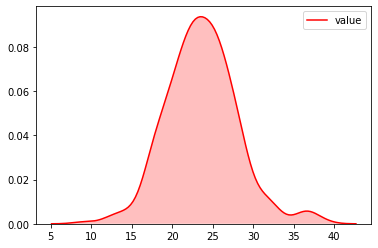

In [44]:
# in general distribution of number of case
ax= sns.kdeplot(symptomsofdepressive['value'],shade=True, color='r');

Most number of symtomps of depressive disorder occurs around 25 in general.

##### 2.1.2.1 Age
Let's look at case numbers of the each age group per weeks

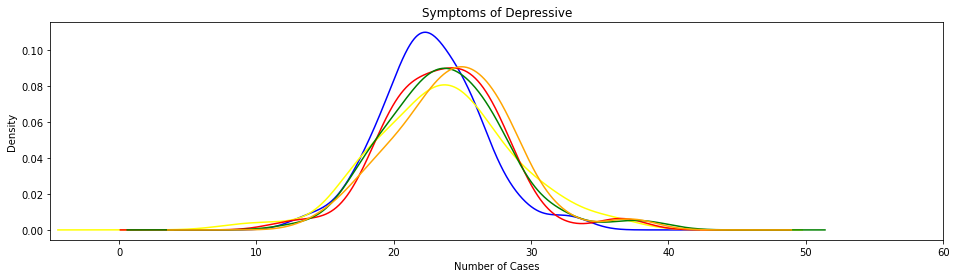

In [45]:
symptomsofdepressive[symptomsofdepressive['week']==1]['value'].plot(kind='density',figsize=(16,4), color='Blue', xlim=(-5, 60),  );
symptomsofdepressive[symptomsofdepressive['week']==2]['value'].plot(kind='density',figsize=(16,4), color='Yellow', xlim=(-5, 60) );
symptomsofdepressive[symptomsofdepressive['week']==3]['value'].plot(kind='density',figsize=(16,4), color='Red', xlim=(-5, 60) );
symptomsofdepressive[symptomsofdepressive['week']==4]['value'].plot(kind='density',figsize=(16,4), color='Green', xlim=(-5, 60) );
symptomsofdepressive[symptomsofdepressive['week']==5]['value'].plot(kind='density',figsize=(16,4), color='Orange', xlim=(-5, 60) );
plt.xlabel('Number of Cases')
plt.ylabel('Density')
plt.title('Symptoms of Depressive');

Week1 has most case number around 20 while week5 has the most number of cases close to 30. That makes sense because more weeks we have, more cases could be increased

##### 2.1.2.2 Age

Now, I am interested in looking by gender

In [46]:
#Explore the data by gender
symptomsofdepressive[symptomsofdepressive['group']=='By Gender'].head()

,indicator,group,state,subgroup,week,week_label,value
8,Symptoms of Depressive Disorder,By Gender,United States,Male,1,Apr 23 - May 5,20.8
9,Symptoms of Depressive Disorder,By Gender,United States,Female,1,Apr 23 - May 5,26.1
218,Symptoms of Depressive Disorder,By Gender,United States,Male,2,May 7 - May 12,22.3
219,Symptoms of Depressive Disorder,By Gender,United States,Female,2,May 7 - May 12,25.8
428,Symptoms of Depressive Disorder,By Gender,United States,Male,3,May 14 - May 19,22.1


In [47]:
# Do two data sets
female=np.array(symptomsofdepressive[symptomsofdepressive['subgroup']=='Female']['value'])
male=np.array(symptomsofdepressive[symptomsofdepressive['subgroup']=='Male']['value'])

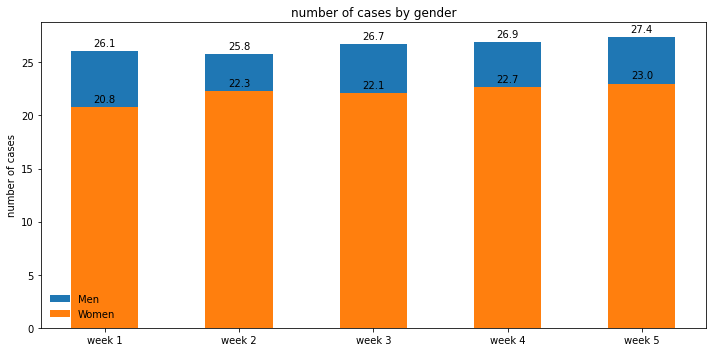

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
label=['week 1','week 2','week 3','week 4','week 5']
x=np.arange(len(label))
width=0.5
rects1 = ax.bar(x, female, width, label='Men')
rects2 = ax.bar(x, male, width, label='Women')

#  Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('number of cases')
ax.set_title('number of cases by gender')
ax.set_xticks(x)
ax.set_xticklabels(label)
ax.legend(loc='lower left', frameon=False)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height ),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

Number of males is higher hand female.

### 2.2 Survey Related to Covid-19

#### 2.2.1 Social Life

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
survey=pd.read_csv('/content/Covid_survey_soc.csv')
survey.head()

,State,Question-1A,Question-1B,Question-2A,Question-2B,Qestion-3A,Qestion-3B,Question-4A,Question-4B,Question-4C,Question-4D,Question-4E
0,New York,4,4,2,1,1,1,1,1,1,1,1
1,New York,2,2,1,1,2,1,1,1,2,1,1
2,New York,2,2,1,1,2,2,1,1,1,2,1
3,New York,3,3,2,2,2,2,1,1,1,1,1
4,New York,2,3,1,1,2,2,1,1,2,1,1


In [53]:
# Let's look at the shape and states names
print(survey.shape)
print(survey['State'].value_counts().head())

(395, 12)
 New York    395
Name: State, dtype: int64


In [54]:
# Look at the type of state
survey['State'].dtype

dtype('O')

In [55]:
# Any missing numbers
survey.isnull().sum()

State          0
Question-1A    0
Question-1B    0
Question-2A    0
Question-2B    0
Qestion-3A     0
Qestion-3B     0
Question-4A    0
Question-4B    0
Question-4C    0
Question-4D    0
Question-4E    0
dtype: int64

In [56]:
# Any strange entry
survey.sample(20)
survey.head(20)
survey.tail(20)

,State,Question-1A,Question-1B,Question-2A,Question-2B,Qestion-3A,Qestion-3B,Question-4A,Question-4B,Question-4C,Question-4D,Question-4E
375,New York,2,3,1,2,2,2,3,3,1,3,1
376,New York,4,4,2,3,2,2,2,3,1,3,1
377,New York,1,1,1,1,2,2,1,2,3,2,1
378,New York,2,2,2,2,1,1,1,1,1,1,1
379,New York,3,3,2,1,2,2,4,3,3,4,1
380,New York,2,2,1,1,2,2,1,1,1,1,1
381,New York,3,4,1,1,2,2,1,1,1,1,1
382,New York,3,3,1,1,2,2,4,4,3,2,1
383,New York,1,1,2,2,2,2,1,1,1,1,1
384,New York,4,4,1,1,2,2,4,4,4,4,3


Looks very clean and ready to play with data

Here is the survey question I am looking for:

*   Question-1A: In the past month, how often did you talk with any of your neighbors?

*    Question-1B: During a typical month prior to March 1, 2020, when COVID-19 began spreading in the United States, how often did you talk
with any of your neighbors?

*   Question-2A: In the past month, how often did you communicate with friends and family by phone, text, email, app, or using the Internet?

*    Question-2B: During a typical month prior to March 1, 2020, when COVID-19 began spreading in the United States, how often did you
communicate with friends and family by phone, text, email, app, or using the Internet?

*    Question-3A: In the past month, did you spend any time volunteering for any organization or association, or not?

*    Question-3B: During a typical month prior to March 1, 2020, when COVID-19 began spreading in the United States, did you spend any time
volunteering for any organization or association, or not?

Question 1 and 2 have the answer options :

- 1 : Basically every day
- 2 : A few times a week
- 3 : A few times a month 
- 4 : Once a month 
- 5 : Not at all
- 6 : Not sure 
- 7 : Skipped on the web

Question 3 answer options:

- 1 : Yes
- 2 : No
- 3 : Not Sure
- 4 : Skip on the web


In [57]:
#Check the data type
survey['Question-1A'].dtype

dtype('int64')

In [58]:
# Change the data types as categorical variables
a=3
str(a)

'3'

In [59]:
# Write a function
def my_number(a):
  return str(a)
my_number(a)

'3'

In [60]:
survey['Q-1A']=survey['Question-1A'].apply(my_number)
survey.sample()
survey[['Question-1A','Q-1A']].sample(3)

,Question-1A,Q-1A
344,2,2
10,2,2
253,3,3


In [61]:
# Let's change the data type for column 'Question-1B'

survey['Q-1B']=survey['Question-1B'].apply(my_number)
survey.sample()
survey[['Question-1B','Q-1B']].sample(3)

,Question-1B,Q-1B
112,2,2
343,4,4
166,2,2


In [62]:
# Create a new dataset

concretion=survey[['State','Q-1A','Q-1B']]
concretion['Q-1A'].value_counts().sort_index()

1      53
2     134
3     103
4      50
5      49
77      4
98      2
Name: Q-1A, dtype: int64

In [63]:
concretion['Q-1B'].value_counts().sort_index()

1      52
2     138
3     104
4      44
5      48
77      7
98      2
Name: Q-1B, dtype: int64

In [64]:
# add the same groups in a list
numbers=['1','2','3','4','5','6','7']
Q1a=[53,134,103,50,49,4,2]
Q1b=[52,138,104,44,48,7,2]

In [65]:
import plotly.graph_objects as go


fig = go.Figure(data=[
    go.Bar(name='Before Covid-19 began', x=numbers, y=Q1a),
    go.Bar(name='When Covid-19 began', x=numbers, y=Q1b)
])    
# Change the bar mode
fig.update_layout(barmode='group',title_text='The Effect of Covid-19 on Neighbors Relationships')
fig.show()

##### 2.2.1.1 Compare Question 2A with Question 2B

*   Question-2A: In the past month, how often did you communicate with friends and family by phone, text, email, app, or using the Internet?

*    Question-2B: During a typical month prior to March 1, 2020, when COVID-19 began spreading in the United States, how often did you
communicate with friends and family by phone, text, email, app, or using the Internet?

In [66]:
# New Dataset
concretion_2=survey[['State','Question-2A','Question-2B']]
concretion_2.head(2)


,State,Question-2A,Question-2B
0,New York,2,1
1,New York,1,1


In [67]:
# Change the type of variables as string
survey['Q-2A']=survey['Question-2A'].apply(my_number)
survey.sample()
survey[['Question-2A','Q-2A']].sample(3)

,Question-2A,Q-2A
40,2,2
92,1,1
228,3,3


In [68]:
# Change the type of variables as string
survey['Q-2B']=survey['Question-2B'].apply(my_number)
survey.sample()
survey[['Question-2B','Q-2B']].sample(3)

,Question-2B,Q-2B
331,1,1
268,1,1
81,1,1


In [69]:
# Find the total nombers for each categories
survey['Q-2A'].value_counts().sort_index()

1     267
2      95
3      20
4       2
5       8
77      1
98      2
Name: Q-2A, dtype: int64

In [70]:
survey['Q-2B'].value_counts().sort_index()

1     220
2     128
3      33
4       7
5       4
77      1
98      2
Name: Q-2B, dtype: int64

In [71]:
Q2a=[267,95,20,2,8,1,2]
Q2b=[220,128,33,7,4,1,2]

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
labels=['Basically every day',' A few times a week', 'A few times a month',
        'Once a month','Not at all','Not sure','Skipped on the web']
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Before Covid-19 began', 'When Covid-19 began'])
fig.add_trace(go.Pie(labels=labels, values=Q2a, scalegroup='one',
                     name='Before Covid-19 began'), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=Q2b, scalegroup='one',
                     name='When Covid-19 began'), 1, 2)

fig.update_layout(title_text='The Effect of Covid-19 on Friends and Family Relationships')
fig.show()

##### 2.2.1.2 Compare Question 3A with Question 3B

*    Question-3A: In the past month, did you spend any time volunteering for any organization or association, or not?

*    Question-3B: During a typical month prior to March 1, 2020, when COVID-19 began spreading in the United States, did you spend any time
volunteering for any organization or association, or not?


In [73]:
# Create a new dataset
# Change the type of variables as string
survey['Q-3A']=survey['Qestion-3A'].apply(my_number)
survey.sample()
survey[['Qestion-3A','Q-3A']].sample(3)

,Qestion-3A,Q-3A
321,2,2
334,2,2
265,2,2


In [74]:
# Convert the data types
survey['Q-3B']=survey['Qestion-3B'].apply(my_number)
survey.sample()
survey[['Qestion-3B','Q-3B']].sample(3)

,Qestion-3B,Q-3B
230,2,2
55,2,2
32,2,2


In [75]:
# Find the total numbers for each categories
survey['Q-3A'].value_counts().sort_index()

1      55
2     338
77      2
Name: Q-3A, dtype: int64

In [76]:
# Find the total nombers for each categories
survey['Q-3B'].value_counts().sort_index()

1     104
2     287
77      3
98      1
Name: Q-3B, dtype: int64

In [77]:
Q3a=[55,338,2,0]
Q3b=[104,287,3,1]
labels=['yes','No','Not Sure','Skipped on the web']

In [78]:
# Graph and table
import plotly.graph_objects as go
import plotly.figure_factory as ff

# Add table data
table_data = [['Question','yes','No','Not Sure'],
              ['In the past month, <br>did you spend any time<br>volunteering for any <br>organization or association?', 55,338,2],
              ['When COVID-19 began <br>spreading in the United States,<br>did you spend any time<br>volunteering <br>for any organization<br>or association?', 104,287,3]]

# Initialize a figure with ff.create_table(table_data)
fig = ff.create_table(table_data, height_constant=60)

# Add graph data
labels=['yes','No','Not Sure']
Q3a=[55,338,2,]
Q3b=[104,287,3]

# Make traces for graph
trace1 = go.Bar(x=labels, y=Q3a, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'),
                name='Before Covid-19 began')
trace2 = go.Bar(x=labels, y=Q3b, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'),
                name='When Covid-19 began')

# Add trace data to figure
fig.add_traces([trace1, trace2])

# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Goals'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'The Effect of Covid-19 on Volunteering for Any Organization or Association'})

# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':800})

# Plot!
fig.show()

#### 2.2.2 Pyschological Effects

##### 2.2.2.1 Feelings

* Question-4: In the past 7 days, how often have you?
                
     4.A ) Felt nervous, anxious, or on edge

     4.B  ) Felt depressed 

     4.C  ) Felt lonely

     4.D  ) Felt hopeless about the future

     4.E  ) Had physical reactions such as sweating, trouble breathing,
nausea or a pounding heart when thinking about your
experience with the coronavirus pandemic


 Question Answer options: 

- 1 : Not at all or less than 1 day
- 2 : 1-2 days
- 3 : 3-4 days
- 4 : 5-7 days

In [79]:
# Column names
survey.columns

Index(['State', 'Question-1A', 'Question-1B', 'Question-2A', 'Question-2B',
       'Qestion-3A', 'Qestion-3B', 'Question-4A', 'Question-4B', 'Question-4C',
       'Question-4D', 'Question-4E', 'Q-1A', 'Q-1B', 'Q-2A', 'Q-2B', 'Q-3A',
       'Q-3B'],
      dtype='object')

In [80]:
# I need to all columns with staring Question-4, and their values to create a new dataset

concretion_4=survey[['State', 'Question-4A', 'Question-4B', 'Question-4C',
       'Question-4D', 'Question-4E']]
concretion_4.head(3)

,State,Question-4A,Question-4B,Question-4C,Question-4D,Question-4E
0,New York,1,1,1,1,1
1,New York,1,1,2,1,1
2,New York,1,1,1,2,1


In [81]:
# Convert the Data Type
survey['Q-4A']=survey['Question-4A'].apply(my_number)
survey.sample()
survey[['Question-4A','Q-4A']].sample(3)

,Question-4A,Q-4A
300,1,1
301,1,1
65,2,2


In [82]:
# Convert the Data Type
survey['Q-4B']=survey['Question-4B'].apply(my_number)
survey.sample()
survey[['Question-4B','Q-4B']].sample(3)

,Question-4B,Q-4B
255,2,2
109,1,1
191,1,1


In [83]:
# Convert the Data Type
survey['Q-4C']=survey['Question-4C'].apply(my_number)
survey.sample()
survey[['Question-4C','Q-4C']].sample(3)

,Question-4C,Q-4C
68,1,1
76,3,3
334,1,1


In [84]:
# Convert the Data Type
survey['Q-4D']=survey['Question-4D'].apply(my_number)
survey.sample()
survey[['Question-4D','Q-4D']].sample(3)

,Question-4D,Q-4D
14,1,1
125,1,1
349,2,2


In [85]:
# Convert the Data Type
survey['Q-4E']=survey['Question-4E'].apply(my_number)
survey.sample()
survey[['Question-4E','Q-4E']].sample(3)

,Question-4E,Q-4E
286,1,1
340,1,1
173,2,2


In [86]:
# Create new lists
survey['Q-4A'].value_counts().sort_index()

1     242
2      76
3      37
4      38
98      2
Name: Q-4A, dtype: int64

In [87]:
survey['Q-4B'].value_counts().sort_index()

1     227
2      87
3      38
4      41
77      1
98      1
Name: Q-4B, dtype: int64

In [88]:
survey['Q-4C'].value_counts().sort_index()

1     236
2      84
3      40
4      31
77      1
98      3
Name: Q-4C, dtype: int64

In [89]:
survey['Q-4D'].value_counts().sort_index()

1     223
2      88
3      40
4      41
77      1
98      2
Name: Q-4D, dtype: int64

In [90]:
survey['Q-4E'].value_counts().sort_index()

1     347
2      32
3       8
4       6
77      1
98      1
Name: Q-4E, dtype: int64

In [91]:
a=[242,76,37,38]
b=[227,87,38,41]
c=[236,84,80,31]
d=[227,87,38,41]
e=[347,32,8,6]

In [92]:
import plotly.graph_objects as go

Labels = ['Not at all or less than 1 day','1-2 days','3-4 days','5-7 days']

fig = go.Figure()
fig.add_trace(go.Bar(
    x=Labels,
    y=[242,76,37,38],
    name='Felt Nervous or Anxious',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=Labels,
    y=[227,87,38,41],
    name='Felt Depressed',
    marker_color='Sandy brown'
))
fig.add_trace(go.Bar(
    x=Labels,
    y=[236,84,80,31],
    name='Felt Lonely',
    marker_color='darks almon'
))
fig.add_trace(go.Bar(
    x=Labels,
    y=[227,87,38,41],
    name='Felt Hopeless <br>about the Future',
    marker_color='light salmon'
))
fig.add_trace(go.Bar(
    x=Labels,
    y=[347,32,8,6],
    name='Had Physical Reactions',
    marker_color='orange'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.layout.update({'title': 'The Effect of Covid-19 on Feeling of A Person'})
fig.show()

##### 2.2.2.2 Nervousness and Anxiousness by Gender
   People who feel nervous and anxious in last 7 days are mostly women or men. 

I assume during this period, female might feel anxious and nevious more common than men feel.
   
   Null Hypothesis: Number of female and number of male feel anxious and nervous during a few days, and both gender's means are equal.

    mean1=mean2 
   
   Alternative Hypothesis: Female means are not equal to male mean. Number of females who feel anxious and nervous during 3-4 days are not close or equal to number of males.

In [93]:
psychology=pd.read_csv('/content/COVID_W3_psychology_survey.csv')
psychology.head()

,State,Question -4A,Question -4B,Question -4C,Question -4D,Question -4E,Age,Gender,EDUCATION,Hh_Banner
0,Maryland,1,1,1,1,1,55-64,2,6,1
1,Azinona,1,1,1,1,1,65-74,1,6,5
2,Montana,1,1,2,2,1,45-54,2,6,1
3,Illinois-Indiana-Wisconsin,2,2,3,3,1,18-24,2,4,5
4,Maryland,1,1,1,2,1,55-64,1,7,2


In [94]:
psychology.shape

(7505, 10)

In [95]:
#Create sex dataset
female=psychology[psychology['Gender']==2]
female.head()

,State,Question -4A,Question -4B,Question -4C,Question -4D,Question -4E,Age,Gender,EDUCATION,Hh_Banner
0,Maryland,1,1,1,1,1,55-64,2,6,1
2,Montana,1,1,2,2,1,45-54,2,6,1
3,Illinois-Indiana-Wisconsin,2,2,3,3,1,18-24,2,4,5
5,Ohio,2,3,4,3,2,18-24,2,5,5
6,Ohio,2,4,4,1,3,25-34,2,4,2


In [96]:
#Create sex dataset
male=psychology[psychology['Gender']==1]
male.head(2)

,State,Question -4A,Question -4B,Question -4C,Question -4D,Question -4E,Age,Gender,EDUCATION,Hh_Banner
1,Azinona,1,1,1,1,1,65-74,1,6,5
4,Maryland,1,1,1,2,1,55-64,1,7,2


Question 4A has 6 categories:

* Not at all or less than 1 day

* 1-2 days

* 3-4 days

* 5-7 days

* Not Sure

* Skipped on the web

Based on this categories, I will look at the category '3-4', and I will compare to means of both genders

###### Female

In [97]:
female.sample(5)

,State,Question -4A,Question -4B,Question -4C,Question -4D,Question -4E,Age,Gender,EDUCATION,Hh_Banner
4136,Pennsylvania,1,1,1,1,1,25-34,2,2,3
4432,Colorado,2,2,1,2,1,65-74,2,6,1
5340,Alabama,1,2,2,1,1,25-34,2,5,2
1028,Ohio,1,2,1,2,1,65-74,2,5,1
757,Minnesota,2,2,1,2,1,18-24,2,3,5


In [98]:
# convert the categorical values as 0 or 1
female['Question_new_4A']=np.where(female['Question -4A']==3,1,0)

In [99]:
female[['Question -4A','Question_new_4A']].sample(5)

,Question -4A,Question_new_4A
3744,1,0
7447,2,0
6199,1,0
712,4,0
2622,2,0


In [100]:
# do same thing for male
male['Question_new_4A']=np.where(male['Question -4A']==3,1,0)

In [101]:
male[['Question -4A','Question_new_4A']].head()

,Question -4A,Question_new_4A
1,1,0
4,1,0
10,1,0
11,3,1
13,2,0


In [102]:
# t-test
from scipy.stats import ttest_ind
ttest_ind(female['Question_new_4A'], male['Question_new_4A'], nan_policy='omit')

Ttest_indResult(statistic=3.5890475845801997, pvalue=0.000334006608969499)

Based on the p_value and statistics, I will reject the Null hyphotesis. I can conclude 95 % confidently that there are significantly mean differences between two population.

Let's look at the more close and let's see what is happening. Which gender has more anxiouness and nervousness.

In [103]:
# check the data type
female['Question -4A'].dtype

dtype('int64')

In [104]:
female['Gender'].dtype

dtype('int64')

Thus, it is interger. I need string to make categorical comparison.

In [105]:
# create a function
def number_type(a):
  return str(a)
number_type(3)

'3'

In [106]:
female['Question4A']=female['Question -4A'].apply(number_type)

In [107]:
female[['Question4A','Question -4A']].head()

,Question4A,Question -4A
0,1,1
2,1,1
3,2,2
5,2,2
6,2,2


In [108]:
# Same for male
male['Question4A']=male['Question -4A'].apply(number_type)

In [109]:
male[['Question4A','Question -4A']].head()

,Question4A,Question -4A
1,1,1
4,1,1
10,1,1
11,3,3
13,2,2


In [110]:
import plotly.graph_objects as go
import numpy as np


fig = go.Figure()
fig.add_trace(go.Histogram(
    x=female['Question4A'],
    name='Female', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=0,
        end=6.0,
        size=0.5
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=male['Question4A'],
    name='Male',
    xbins=dict(
        start=0,
        end=4,
        size=0.5
    ),
    marker_color='#330C73',
    opacity=0.5
))

fig.update_layout(
    title_text='Nervousness and Anxiousness by Gender', # title of plot
    xaxis_title_text='How you feel', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig.show()

###### Age

In [111]:
# Check the data one more time
psychology['Age'].value_counts()

65-74                               1292
55-64                               1179
35-44                                889
25-34                                840
45-54                                772
(7) 75+                              564
18-24                                350
2) 25-34                             106
(5) 55-64                             98
(3) 35-44                             81
(4) 45-54                             78
(1) 18-24                             32
(88) Removed for disclosure risk       2
Name: Age, dtype: int64

In [112]:
psychology[psychology['Age']=="(7) 75+"]='75+'
psychology[psychology['Age']=="2) 25-34"]='25-34'
psychology[psychology['Age']=="(5) 55-64"]='55-64'
psychology[psychology['Age']=="(3) 35-44"]='35-44'
psychology[psychology['Age']=="(4) 45-54"]='45-54'
psychology[psychology['Age']=="(1) 18-24"]='18-24'
psychology[psychology['Age']=="(88) Removed for disclosure risk"]='88'

In [113]:
# Let's check
psychology['Age'].value_counts().sort_index()

18-24     382
25-34     946
35-44     970
45-54     850
55-64    1277
65-74    1292
75+       564
88          2
Name: Age, dtype: int64